# ANALIZA ŠTUDENSTKEGA DELA

#### Avtor: Jan Šifrer

Za projektno nalogo sem si izbral analizo študenskega dela. Vse potrebne podatke za to sem dobil na spletni strani https://www.studentski-servis.com/studenti. Moj cilj je, da pokažem kje se najbolje splača delati šudentom - torej v katerih mestih, za katera dela dobivajo najvišijo plačo in predvsem kako sta vrsta dela ter delavnik odvisna od plačila. 

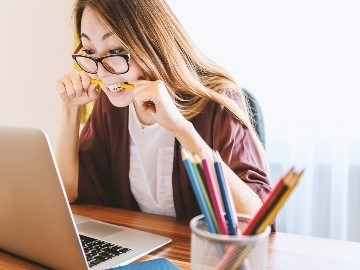



Najprej naložimo pakete:

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plot
import math
from funkcije import boljsa_lokacija
from funkcije import koliko_besed_je_v_imenu
from funkcije import ali_je_neto
from funkcije import zaokrozena_neto_placa


#Nastavil sem, da izpiše samo 10 vrstic, zato da lažje delam
pd.options.display.max_rows = 15

Nastavimo stil risanja:

In [2]:
%matplotlib inline

Naložimo še podatke s katere bomo preučevali:

In [3]:
podatki = pd.read_csv("prosta_dela1.csv")
podatki=podatki.drop([821])

Izbirati sem moral vrstico 821, ker ni imela podatkov o plači.
# Najprej si poglejmo katerih del je Slovenske študente največ. Da se bo lažje videlo, bom najprej združil vsa dela po naslovih skupaj. 

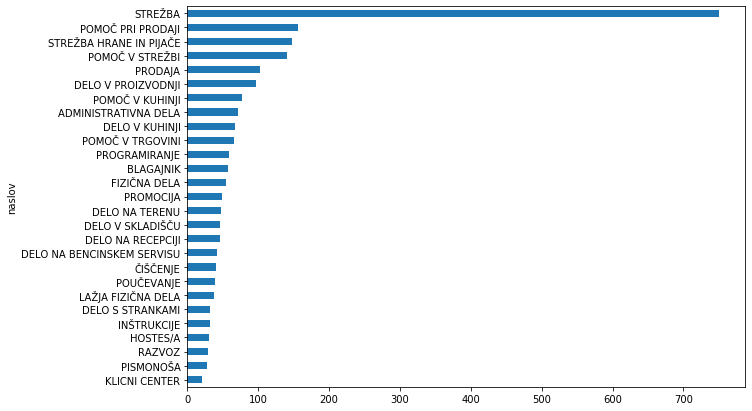

In [18]:
seznam_del = podatki.groupby("naslov").size().sort_values(ascending=True)
seznam_del[seznam_del>20].plot(kind='barh', figsize=(10,7))

Opazimo lahko, da delodajalci največ študentov potrebujejo v strežbi ter v panogi - pomoč pri prodaji.

# Sedaj pa si poglejmo v katerih mestih lahko študentje najdejo največ različnih delovnih mest.

In [5]:
pd.set_option('display.max_rows', 4000)

* Zgornje bom izbirsal!!

Ker so podatki dokaj slabo predstavljeni, jih bomo najprej malo popravili, da se bo lažje videlo, v katerih mestih lahko študentje izbiranjo med največ deli. To bomo naredili s funkcijo 'boljsa_lokacija', ki popravlja in združuje lokacije del.

In [6]:
podatki["boljsa_lokacija"] = podatki["lokacija"].apply(boljsa_lokacija)
podatki["stevilo_besed"] = podatki["boljsa_lokacija"].apply(koliko_besed_je_v_imenu)

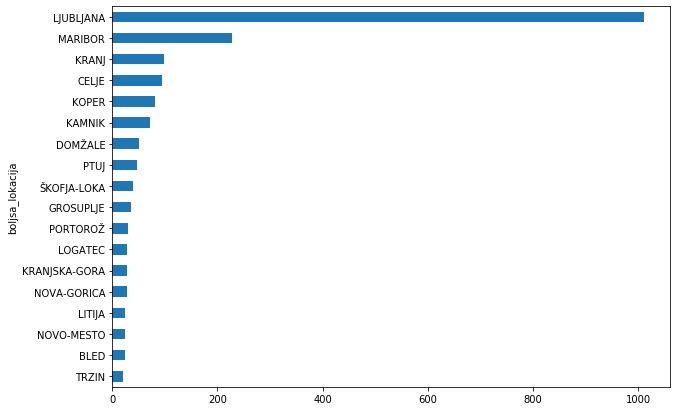

In [12]:
seznam_mest = podatki.groupby('boljsa_lokacija').size().sort_values(ascending=True)
seznam_mest[seznam_mest>20].plot(kind='barh', figsize=(10,7))

Vidimo lahko, da je največ prostih del v Ljubljani, nato v Mariboru, v Kranju in Celju pa jih je skoraj enako. In to je tudi nekako logičeno, saj so to tudi Slovenska največja štiri mesta, torej imajo tudi največ prostih delovnih mest za študente.

# Sedaj pa si poglejmo za kakšne plače lahko študentje izbirajo dela

Za lažjo predstavo bom najprej naredil še novo tabelo, kjer bodo samo podatki o lokaciji, naslovu in plačilu dela. Tej tabeli bom dodal še zaokroženo plačo, da se bo zadeva lepše videla na grafu.

In [8]:
podatki['ali_neto']=podatki['neto_placa'].apply(ali_je_neto)
priprava_tabele=podatki[podatki['ali_neto']]
tabela_placa=priprava_tabele.loc[:,('sifra','boljsa_lokacija','naslov','neto_placa')]
tabela_placa['zaokrozena_placa']=tabela_placa['neto_placa'].apply(zaokrozena_neto_placa)

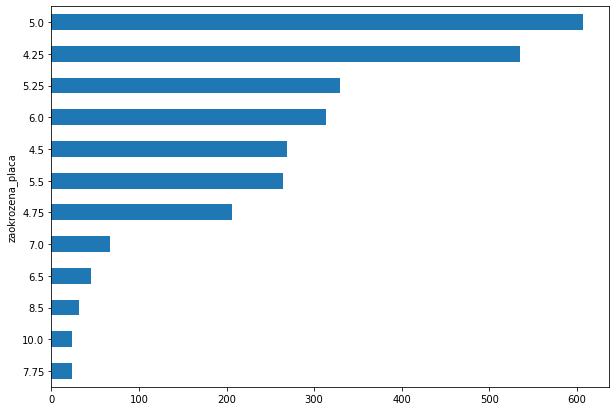

In [17]:
placa=tabela_placa.groupby('zaokrozena_placa').size().sort_values(ascending=True)
placa[placa>20].plot(kind='barh', figsize=(10,7))

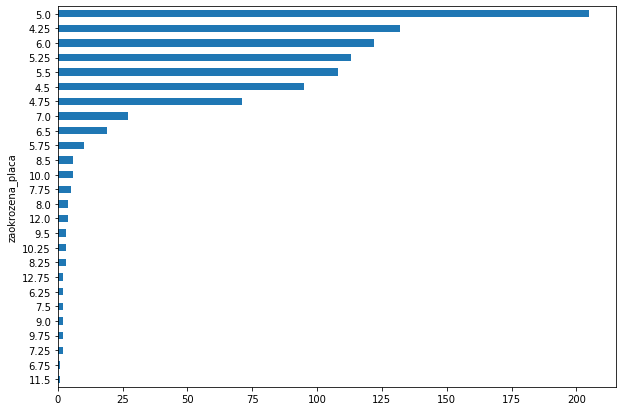

In [86]:
pla = tabela_placa[tabela_placa['boljsa_lokacija']=='LJUBLJANA'].groupby('zaokrozena_placa').size().sort_values(ascending=True).plot(kind='barh', figsize=(10,7))

In [26]:
tabela_placa

,sifra,boljsa_lokacija,naslov,neto_placa,zaokrozena_placa
0,308948,MARIBOR,PROGRAMIRANJE,"7,60 €/h neto",7.75
1,308947,LJUBLJANA,DELJENJE LETAKOV,"4,13 €/h neto",4.25
2,308946,LJUBLJANA,PRODAJA,"5,50 €/h neto",5.50
3,308945,LJUBLJANA,POMOČ UPORABNIKOM,"5,00 €/h neto",5.00
4,308944,KRANJ,BLAGAJNIK,"4,13 €/h neto",4.25
5,308943,TRZIN,DELO S STRANKAMI,"5,00 €/h neto",5.00
6,308942,LJUBLJANA,STREŽBA,"5,50 €/h neto",5.50
7,308941,TRŽIČ,POMOČ PRI PRODAJI,"4,13 €/h neto",4.25
8,308940,LJUBLJANA,ADMINISTRATIVNA DELA,"5,49 €/h neto",5.50
9,308937,SEVNICA,TEHNIČNA POMOČ,"4,13 €/h neto",4.25


In [74]:
#preimenoval sem imena stolpcev
#podatki = podatki.rename({"naslov": "Naslov", "podnaslov": "Podnaslov", "neto_placa": "Neto plača",
#                          "bruto_placa": "Bruto plača","lokacija": "Lokacija", "opis": "Opis",
 #                         "stevilo_mest": "Število mest", "trajanje": "Trajanje", "delovnik": "Delovnik",
  #                        "sifra": "Šifra", "narava_dela": "Narava dela"}, axis=1)

In [75]:
#preimenoval sem imena stolpcev
podatki = podatki.rename({"neto_placa": "neto plača",
                          "bruto_placa": "bruto plača",
                          "stevilo_mest": "število mest",
                          "sifra": "šifra", "narava_dela": "narava dela"}, axis=1)

In [58]:
#stevilo = podatki.groupby("število mest").size()
#stevilo.plot()

In [78]:
# razbitje_imen("tra la la la la")
# razbitje = podatki["lokacija"].apply(koliko_besed_je_v_imenu)


In [79]:
# podatki["novo"] = razbitje
# podatki.groupby("lokacija").size()

In [80]:
podatki[["naslov", "opis", "šifra"]]

,naslov,opis,šifra
0,PROGRAMIRANJE,Razvoj programske opreme na strani strežnika. ...,308948
1,DELJENJE LETAKOV,Deljenje letakov v okolici trgovine. Delovni č...,308947
2,PRODAJA,Prodaja v čokoladnici v stari Ljubljani. Podje...,308946
3,POMOČ UPORABNIKOM,Mlado in energično mednarodno podjetje išče os...,308945
4,BLAGAJNIK,"Podjetje išče polnoletne, komunikativne in sam...",308944
5,DELO S STRANKAMI,Podjetje potrebuje osebo za pomoč strankam za ...,308943
6,STREŽBA,"Strežba v lokalu v centru Ljubljane, pri Zmajs...",308942
7,POMOČ PRI PRODAJI,Podjetje potrebuje osebo za pomoč pri prodaji ...,308941
8,ADMINISTRATIVNA DELA,V trgovini z lesom in lesnimi polizdelki (veza...,308940
9,TEHNIČNA POMOČ,Zavod potrebuje na drsališču pomoč pri organiz...,308937


In [50]:
from ipywidgets import interact
import numpy as np

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [51]:
x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

In [93]:
p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5,5),
           background_fill_color='#efefef')
r = p.line(x, y, color="#8888cc", line_width=1.5, alpha=0.8)

h = "LJUBLJANA"
d = figure(title="simple line example", plot_height=300, plot_width=600)
k = d.vbar(x=[1, 2, 3, 4], width=0.5, bottom=0, top=[1,2,3,4], color="#CAB2D6")


#plot = figure(plot_width=300, plot_height=300)
#plot.vbar(x=[1, 2, 3], width=0.5, bottom=0, top=[1,2,3], color="#CAB2D6")

#show(plot)

In [94]:
def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    r.data_source.data['y'] = A * func(w * x + phi)
    push_notebook()

def up(a):
    h = a
    push_notebook()

In [95]:
show(d, notebook_handle=True)
#interact(update, f=["sin", "cos"], w=(0,50), A=(1,10), phi=(0, 20, 0.1))
interact(up, a=["LJUBLJANA", "KRANJ"])

interactive(children=(Dropdown(description='a', options=('LJUBLJANA', 'KRANJ'), value='LJUBLJANA'), Output()),…

<function __main__.up(a)>

In [59]:
tabela_placa

,sifra,boljsa_lokacija,naslov,neto_placa,zaokrozena_placa
0,308948,MARIBOR,PROGRAMIRANJE,"7,60 €/h neto",7.75
1,308947,LJUBLJANA,DELJENJE LETAKOV,"4,13 €/h neto",4.25
2,308946,LJUBLJANA,PRODAJA,"5,50 €/h neto",5.50
3,308945,LJUBLJANA,POMOČ UPORABNIKOM,"5,00 €/h neto",5.00
4,308944,KRANJ,BLAGAJNIK,"4,13 €/h neto",4.25
5,308943,TRZIN,DELO S STRANKAMI,"5,00 €/h neto",5.00
6,308942,LJUBLJANA,STREŽBA,"5,50 €/h neto",5.50
7,308941,TRŽIČ,POMOČ PRI PRODAJI,"4,13 €/h neto",4.25
8,308940,LJUBLJANA,ADMINISTRATIVNA DELA,"5,49 €/h neto",5.50
9,308937,SEVNICA,TEHNIČNA POMOČ,"4,13 €/h neto",4.25
